In [1]:
#Importing the required modules
import numpy as np
import numba
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from time import time
from BasicFunctions import *
from TabuSampler import *


In [2]:
#Generating the database
from DatabaseClass import create_databases

#Global parameters used
lmbd = 40
l = 15 #The number of categories for each record
p_cat = np.array([0.05, 0.15, 0.4, 0.2, 0.2]) #The pval vector for each category
beta = 0.01

p_match, x, y, M_truth, M_reverse_truth = create_databases(lmbd, l, p_cat, beta)

#Other parameters that are needed
N_1 = len(x)
N_2 = len(y)
num_gens = N_1*N_2

print("The length of the x database: ",N_1)
print("The length of the y database: ",N_2)
print("The golden truth p_match: ", p_match)
print("The number of generators: ", num_gens)
print("The first record of the x database:")
print(x[0, :])
print("The first record of the y database:")
print(y[0,:])
print("The golden truth M vector: ")
print(M_truth)

The length of the x database:  29
The length of the y database:  26
The golden truth p_match:  0.5975622036455879
The number of generators:  754
The first record of the x database:
[3. 2. 2. 0. 2. 3. 0. 3. 4. 2. 1. 1. 2. 3. 3.]
The first record of the y database:
[1. 4. 2. 4. 2. 4. 1. 0. 4. 2. 1. 3. 4. 1. 2.]
The golden truth M vector: 
[23. 21.  2.  0.  0.  4.  0. 11. 26. 16.  9. 10.  0.  0. 17. 20. 25. 22.
  0.  0.  3. 18. 19. 14.  0. 13. 24.  0.  5.]


In [3]:
#Generating an entirely random M vector
M_random, M_reverse_random = random_state(N_1, N_2)

print("The randomly generated M vector:")
print(M_random)

The randomly generated M vector:
[ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 22.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [4]:
#Defining some balancing functions
barker = lambda t: t/(1+t)
sqrt = lambda t: np.sqrt(t)
id = lambda t: t

In [5]:
#Testing this for the heuristic
rates = rates_tabu(M_random, M_reverse_random, barker, lmbd, p_cat, l, beta, p_match, x, y, N_1, N_2)
value = rates.sum()
print("The value at this position would be: ",value)

The value at this position would be:  43.25094254659652


In [6]:
#Testing the jumping heuristic
N = 100

#Creating the randomly sampled array with M and M_reverse samples
M_samples, M_reverse_samples = np.zeros((N,N_1)), np.zeros((N,N_2))

for i in np.arange(0, N):
    M_random, M_reverse_random = random_state(N_1, N_2)
    M_samples[i,:] = M_random
    M_reverse_samples[i,:] = M_reverse_random

In [7]:
# Running the jumping heuristic for a few balancing functions
values_id = jumping_heuristic(N, N_1, N_2, M_samples, M_reverse_samples, id, lmbd, p_match, p_cat, l, beta, x, y)
values_barker = jumping_heuristic(N, N_1, N_2, M_samples, M_reverse_samples, barker, lmbd, p_match, p_cat, l, beta, x, y)
values_sqrt = jumping_heuristic(N, N_1, N_2, M_samples, M_reverse_samples, sqrt, lmbd, p_match, p_cat, l, beta, x, y)

([<matplotlib.axis.XTick at 0x1525fe84a90>,
 [Text(1, 0, 'Identity'), Text(2, 0, 'Barker'), Text(3, 0, 'Sqrt')])

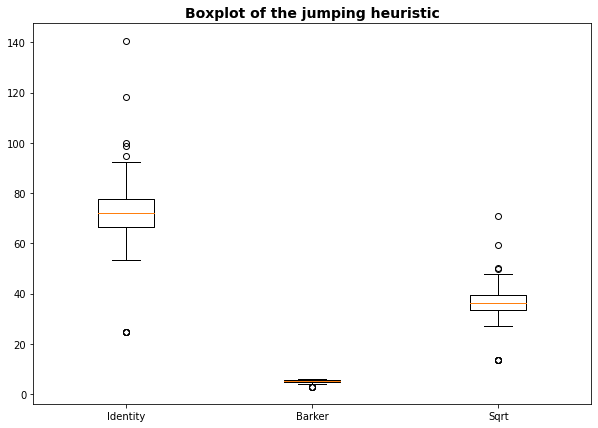

In [8]:
# Making a boxplot to compare these three balancing functions
data = [values_id, values_barker, values_sqrt]

%matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('Boxplot of the jumping heuristic', fontsize=14, fontweight='bold')

# Creating plot
plt.boxplot(data)

# Adding for which function it is
plt.xticks([1,2,3], ['Identity', 'Barker', 'Sqrt'])


